In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/Salary_Data.csv")

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
X = df["YearsExperience"].values

In [8]:
y = df["Salary"].values

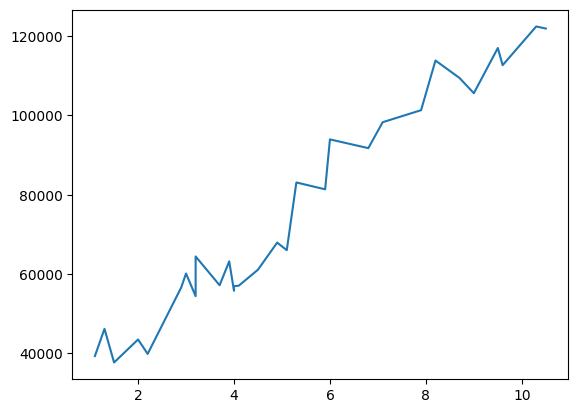

In [9]:
plt.plot(X,y)

In [10]:
X = np.array(X)
Y = np.array(y)

In [11]:
def mean(X):
    return np.sum(X)/len(X)

In [12]:
def variance(X):
    mean_value = mean(X)
    return np.sum((X-mean_value)**2) / len(X)

In [13]:
def norm(X):
    mean_value = mean(X)
    variance_value = variance(X)
    return (X-mean_value) / np.sqrt(variance_value)

In [14]:
X_norm = norm(X)

In [15]:
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

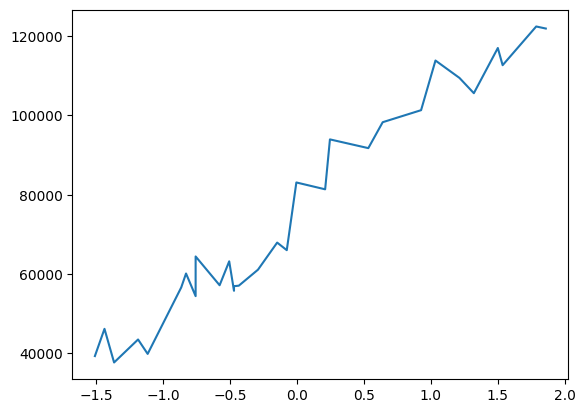

In [16]:
plt.plot(X_norm,Y)

In [17]:
class LinearRegression:
    def __init__(self,lr=0.01, max_iter = 2000, threshold= 1e-6):
        self.lr = lr
        self.max_iter = max_iter
        self.threshold = threshold
        self.weight = 0
        self.bias = 0
    def predict(self,X):
        return self.weight * X + self.bias
    def fit(self, X, Y):
        n = len(X)
        loss_history = []
        y_pred = self.predict(X)
        errors = Y-y_pred
        prev_loss = (1/(2*n)) * np.sum(errors**2)
        loss_history.append(prev_loss)
        for i in range(self.max_iter):
            w_grad = (1/n) * np.sum(errors*X)
            b_grad = (1/n) * np.sum(errors)
            self.weight +=self.lr * w_grad
            self.bias += self.lr * b_grad
            y_pred = self.predict(X)
            errors = Y-y_pred
            curr_loss = (1/(2*n)) * np.sum(errors**2)
            if np.abs(curr_loss-prev_loss) < self.threshold:
                break
            prev_loss = curr_loss
            loss_history.append(curr_loss)
        return loss_history
    def plot(self, X, Y):
        y_pred = self.predict(X)
        plt.plot(X,Y)
        plt.plot(X,y_pred)

In [18]:
model = LinearRegression()

In [19]:
loss_history = model.fit(X_norm,Y)

In [20]:
loss_history

[np.float64(3251477635.366667),
 np.float64(3187084376.3925066),
 np.float64(3123972543.2719326),
 np.float64(3062116635.630458),
 np.float64(3001491660.5510483),
 np.float64(2942073122.475719),
 np.float64(2883837013.3080883),
 np.float64(2826759802.7128944),
 np.float64(2770818428.6085453),
 np.float64(2715990287.848871),
 np.float64(2662253227.090316),
 np.float64(2609585533.8408556),
 np.float64(2557965927.687059),
 np.float64(2507373551.6957235),
 np.float64(2457787963.986615),
 np.float64(2409189129.472918),
 np.float64(2361557411.766044),
 np.float64(2314873565.2415366),
 np.float64(2269118727.262866),
 np.float64(2224274410.559972),
 np.float64(2180322495.759465),
 np.float64(2137245224.0634885),
 np.float64(2095025190.0742621),
 np.float64(2053645334.7614207),
 np.float64(2013088938.569305),
 np.float64(1973339614.6614125),
 np.float64(1934381302.2992873),
 np.float64(1896198260.353168),
 np.float64(1858775060.9417765),
 np.float64(1822096583.1986713),
 np.float64(1786148007.1

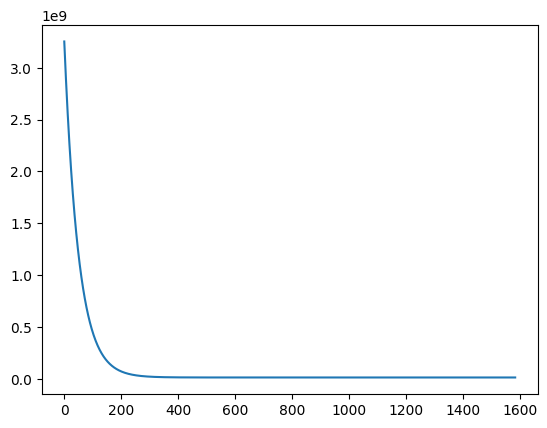

In [21]:
plt.plot(loss_history)

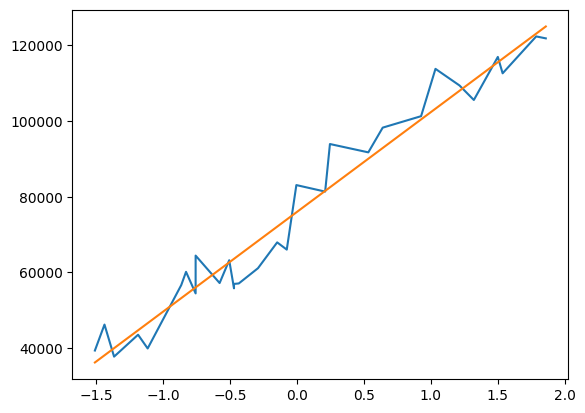

In [22]:
model.plot(X_norm,Y)